<a href="https://colab.research.google.com/github/kidninja23/learn-co-sandbox/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jason Bice<br>
CS4242 - W01<br>
Assignment 3<br>**
Problem 1: To implement a perceptron to simulate the function for classifying an image with 2 x 2 pixels as shown in the PPT. Your input will be 16 training examples.

In [0]:
# Course: CS4242 W01
# Student name: Jason Bice 
# Student ID: 000248436
# Assignment #3 
# Due Date: 4/19/19
# Signature: Jason Bice
# Score:_______________


import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
#set the plot figure size
rcParams["figure.figsize"] = 10, 5
%matplotlib inline


In [0]:
'''Class created based on online tutorial materials from pactpub.com, Python Machine learning Part 1'''
class Perceptron(object):
  '''
  Perceptron Classifier.
  
  Parameters
  ----------
  eta : float
      Learning rate (between 0.0 and 1.0)
  n_iter : int
      Passes (epochs) over the training set
      
      
  Attributes
  ----------
  w_ : id-array
      weights after fitting.
  errors_ : list
      number of misclassification in every epoch
  '''
  
  def __init__(self, eta = 0.01, n_iter = 10):
    self.eta = eta
    self.n_iter = n_iter
    
  def fit(self, X, y):
    '''
    Fit method for training data
    
    Parameters
    ----------
    
    X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where 'n_samples' is the number 
        of samples and 'n_features' is the number of features.
        
    y : {array-like}, shape = [n_samples]
        Target value
        
    Returns
    -------
    self : object
    '''
    self.w_ = np.zeros(1 + X.shape[1]) 
    self.errors_ = [] #initially set as an empty list
    
    for _ in range(self.n_iter): #_ used becuase the item isn't used
      errors = 0 
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    '''
    Calculate the net input
    '''
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    '''
    Return class lable after unit step
    '''
    
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  
  

The Data Set was generated in csv format and uploaded directly to the project. The CSV dataset is included with the assignment being turned in. 

The below code uploads the files directly to colab project. 

In [88]:
from google.colab import files
uploaded = files.upload()

Saving Assignment3_dataset.csv to Assignment3_dataset.csv


The below code snippet assigns the dataset and then displays the complete dataset. For this data set, each 0 represents a black pixel and each 1 represents a white pixel. Each colum represents one of the 4  individual pixels. Each row is one of the 16 possible unique combinations of  

In [89]:
import io

df = pd.read_csv(io.BytesIO(uploaded["Assignment3_dataset.csv"]), header = None)
df

,0,1,2,3,4
0,0,0,0,0,Dark
1,1,0,0,0,Dark
2,0,1,0,0,Dark
3,0,0,1,0,Dark
4,0,0,0,1,Dark
5,1,1,0,0,Bright
6,0,1,1,0,Bright
7,0,0,1,1,Bright
8,1,0,1,0,Bright
9,1,0,0,1,Bright


In [0]:
#extract the first 100 class labels, corresponding to the 50 Iris-setosa

y = df.iloc[0:, 4].values

#np.where(condition[,x,y]) <<--function signature
negative_class = -1
positive_class = 1
condition=y == "Dark"
y = np.where(condition, 
             negative_class, 
             positive_class)

X = df.iloc[0:, [0,1,2,3]].values


Training the perceptron in the code below. 

In [91]:
#instantiate a perceptron object
eta = 0.1
n_iter = 10 #number of passes over the training data

ppn = Perceptron(eta = eta, 
                 n_iter = n_iter)

#fit the perceptron instance to our training data
ppn.fit(X,
       y)


Evaluate the learning process

Text(0, 0.5, 'number of misclassifications')

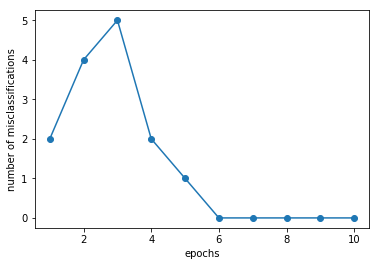

In [92]:
#plot the misclassifications
epochs = range(1, len(ppn.errors_) + 1)
misclassifications=ppn.errors_
marker="o"
plt.plot(epochs,
        misclassifications,
        marker=marker)

#add labels
plt.xlabel('epochs')
plt.ylabel('number of misclassifications')

From the above graph we can see that by the sixth pass over the data set, the neuarl network no longer has any error in predicting if a set should be classified as Dark or Bright. The 16 datapoints represent the entire set of possible outcomes, so any consideration of overfitting the data is not relevant. 

Problem 2: Implement a multi-layer feedforward back-propagation algorithm (we can just call it ANN) that can “Teach a Neural Network for Classification”. <br>Requirements:<br>
1) You must have three layers (input, hidden, and output) in your architecture.<br>
2) Use Sigmoid function as your transfer function.<br>
Implement the ANN to recognize 4 blocks image (such as one image shown below) to make a decision if an image is BRIGHT or DARK. Remember that we have 16 samples for the input. You must have at least three layers in your ANN: input layer, hidden layer, and output layer.

Problem 2 will use the same dataset configuration as problem 1.

In [0]:
import math
from random import seed
from random import random

seed(42)
  
def generate_network(feat, hidden, outs):
    neural_net = []
    h_layer = generate_weights(feat, hidden)
    o_layer = generate_weights(hidden, outs)
    neural_net.append(h_layer)
    neural_net.append(o_layer)
    return neural_net
    
  #generates all weights needed for each feature of a dataset and a bias weight at weights[-1]
def generate_weights(r1, r2):
    w = [ {'weights' : [random() - 0.5 for i in range(r1 + 1)]} for i in range(r2)]
    return w
  
  #Calcualte the weighted sums that will be used for propagating through the network
def weighted_sums(weights, input_vals):
    sums = weights[-1] #initial sum value set to the bias value
    for i in range(len(weights) - 1):
      sums += weights[i] * input_vals[i]
    return sums
  
  #defining the sigmoid function 
def sigmoid(sum_vals):
    s = 1.0/(1.0 + math.exp(-sum_vals))
    return s
    
  #defining sigmoid prime function
def sigmoid_prime(s):
    s_prime = s * (1.0 - s)
    return s_prime
  
  #Forward propagation through the neural network
def f_prop(network, row):
    vals = row
    for layers in network:
      new_vals = []
      for node in layers:
        the_sums = weighted_sums(node['weights'], vals)
        node['output'] = sigmoid(the_sums)
        new_vals.append(node['output'])
      vals = new_vals
    return vals
  
  #Backward propagation through the neural network
def b_prop(network, expected_vals):
    for i in reversed(range(len(network))):
      l = network[i]
      errors = []
      if i != len(network) - 1:
        for j in range(len(l)):
          error = 0.0
          for node in network[i + 1]:
            error += (node['weights'][j] * node['delta'])
          errors.append(error)
      else: 
          for j in range(len(l)):
            node = l[j]
            errors.append(expected_vals[j] - node['output'])
      for j in range(len(l)):
          node = l[j]
          node['delta'] = errors[j] * sigmoid_prime(node['output'])
  #Calculate the weights and assign them for the next pass through the neural network        
def new_weight(network, row, rate):
    for i in range(len(network)):
      inputs = row[:-1]
      if i != 0:
        inputs = [node['output'] for node in network[i - 1]]
      for node in network[i]:
        for j in range(len(inputs)):
          node['weights'][j] += rate * node['delta'] * inputs[j]
        node['weights'][-1] += rate * node['delta']
   #train the network to assign the correct weights.        
def training(network, dataset, rate, epochs, outputs, print_op = 0):
    for epoch in range(epochs):
      total_error = 0
      for row in dataset:
        outs = f_prop(network, row)
        target = [0 for i in range(outputs)]
        target[row[-1]] = 1
        total_error += sum([(target[i] - outs[i])**2 for i in range(len(target))])
        b_prop(network, target)
        new_weight(network, row, rate)
      if print_op != 0:
        print('>epoch=%d, rate=%.3f, error=%.3f' % (epoch, rate, total_error))
  
def prediction(network,row):
    outputs = f_prop(network, row)
    return outputs.index(max(outputs))
        

In [95]:
dataset = [[0,0,0,0,0],
	        [1,0,0,0,0],
          [0,1,0,0,0],
          [0,0,0,1,0],
          [1,1,0,0,1],
          [0,1,1,0,1],
          [0,0,1,1,1],
          [1,0,1,0,1],
          [1,0,0,1,1],
          [0,1,0,1,1],
          [1,1,1,0,1],
          [1,0,1,1,1],
          [1,1,0,1,1],
          [0,1,1,1,1],
          [1,1,1,1,1]]


n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = generate_network(n_inputs, 2, n_outputs)
training(network, dataset, 0.1, 25, n_outputs, 1)


>epoch=0, rate=0.100, error=6.785
>epoch=1, rate=0.100, error=6.590
>epoch=2, rate=0.100, error=6.441
>epoch=3, rate=0.100, error=6.327
>epoch=4, rate=0.100, error=6.240
>epoch=5, rate=0.100, error=6.172
>epoch=6, rate=0.100, error=6.120
>epoch=7, rate=0.100, error=6.080
>epoch=8, rate=0.100, error=6.047
>epoch=9, rate=0.100, error=6.022
>epoch=10, rate=0.100, error=6.001
>epoch=11, rate=0.100, error=5.984
>epoch=12, rate=0.100, error=5.970
>epoch=13, rate=0.100, error=5.959
>epoch=14, rate=0.100, error=5.949
>epoch=15, rate=0.100, error=5.941
>epoch=16, rate=0.100, error=5.934
>epoch=17, rate=0.100, error=5.928
>epoch=18, rate=0.100, error=5.923
>epoch=19, rate=0.100, error=5.918
>epoch=20, rate=0.100, error=5.914
>epoch=21, rate=0.100, error=5.910
>epoch=22, rate=0.100, error=5.907
>epoch=23, rate=0.100, error=5.903
>epoch=24, rate=0.100, error=5.900


We can clearly see that the error is decreasing over each epoch. Twentyfive passes is not quite enough to train the network to acurately make predictions yet. The next section of code increases the epoch value to 200 and forgoes printing each epoch. We then make a prediction based on all rows of the data set. 

In [84]:
training(network, dataset, 0.1, 200, n_outputs, 0)

for row in dataset:
	results = prediction(network, row)
	print('Expected=%d, Got=%d' % (row[-1], results))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


At this point, ANN can succesfully predict any of the 16 possible pixel combinations and classify them as Dark (0) or Bright(1).<br> The only that ANN doesn't do yet is accept the data as an actual block of pixels. The next part will add this functionality. 